# **ARIMA Model (Auto Regressive Integrated Moving Average)**

ARIMA model is good only on stationary dataset. It can not perform good on non-stationary dataset. For that we have 'd' parameter (differencing out) in ARIMA model which transforms non-stationary data to stationary data. Order is (p,d,q)

ACF (Autocorrelation function) graph tells you about all the lag variables which are directly or indirectly impacting your current variable.

PACF (Partial Autocorrelation function) does the same as regular ACF but it shows only the direct effect and all intermediary effects are removed.


In [2]:
pip install pmdarima

AR(p): Auto Regressive Model: will try to use those lagged variables which have direct impact on current version of data. For this it uses PACF graph.

MA(q): Moving Average Model: Makes use of error data points. Gradient Boosting and XGBM are also trained on error data points. MA model predicts error. Uses lagged variables which have direct or indirect impact on current data. For that it uses ACF graph.

ARMA: Combination of AR and MA model

ARIMA: Integrated(d)

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
# adfuller checks if data is stationary or non-stationary (Augmented Dickey-Fuller (ADF) test)

from statsmodels.tsa.arima.model import ARIMA
# ARIMA function for model building

from pmdarima import auto_arima
# from auto_arima we will get order of p,d,q

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
df = pd.read_csv('AveargeTemp.csv', index_col=0, parse_dates=True)
# parse_dates=True tells python that index column is date time column

df

,AvgTemp
DATE,
01-01-2014,40
02-01-2014,43
03-01-2014,41
04-01-2014,37
05-01-2014,31
...,...
26-12-2018,40
27-12-2018,39
28-12-2018,40


In [5]:
df['AvgTemp']

,AvgTemp
DATE,
01-01-2014,40
02-01-2014,43
03-01-2014,41
04-01-2014,37
05-01-2014,31
...,...
26-12-2018,40
27-12-2018,39
28-12-2018,40


**Check stationarity of the data**

<Axes: xlabel='DATE'>

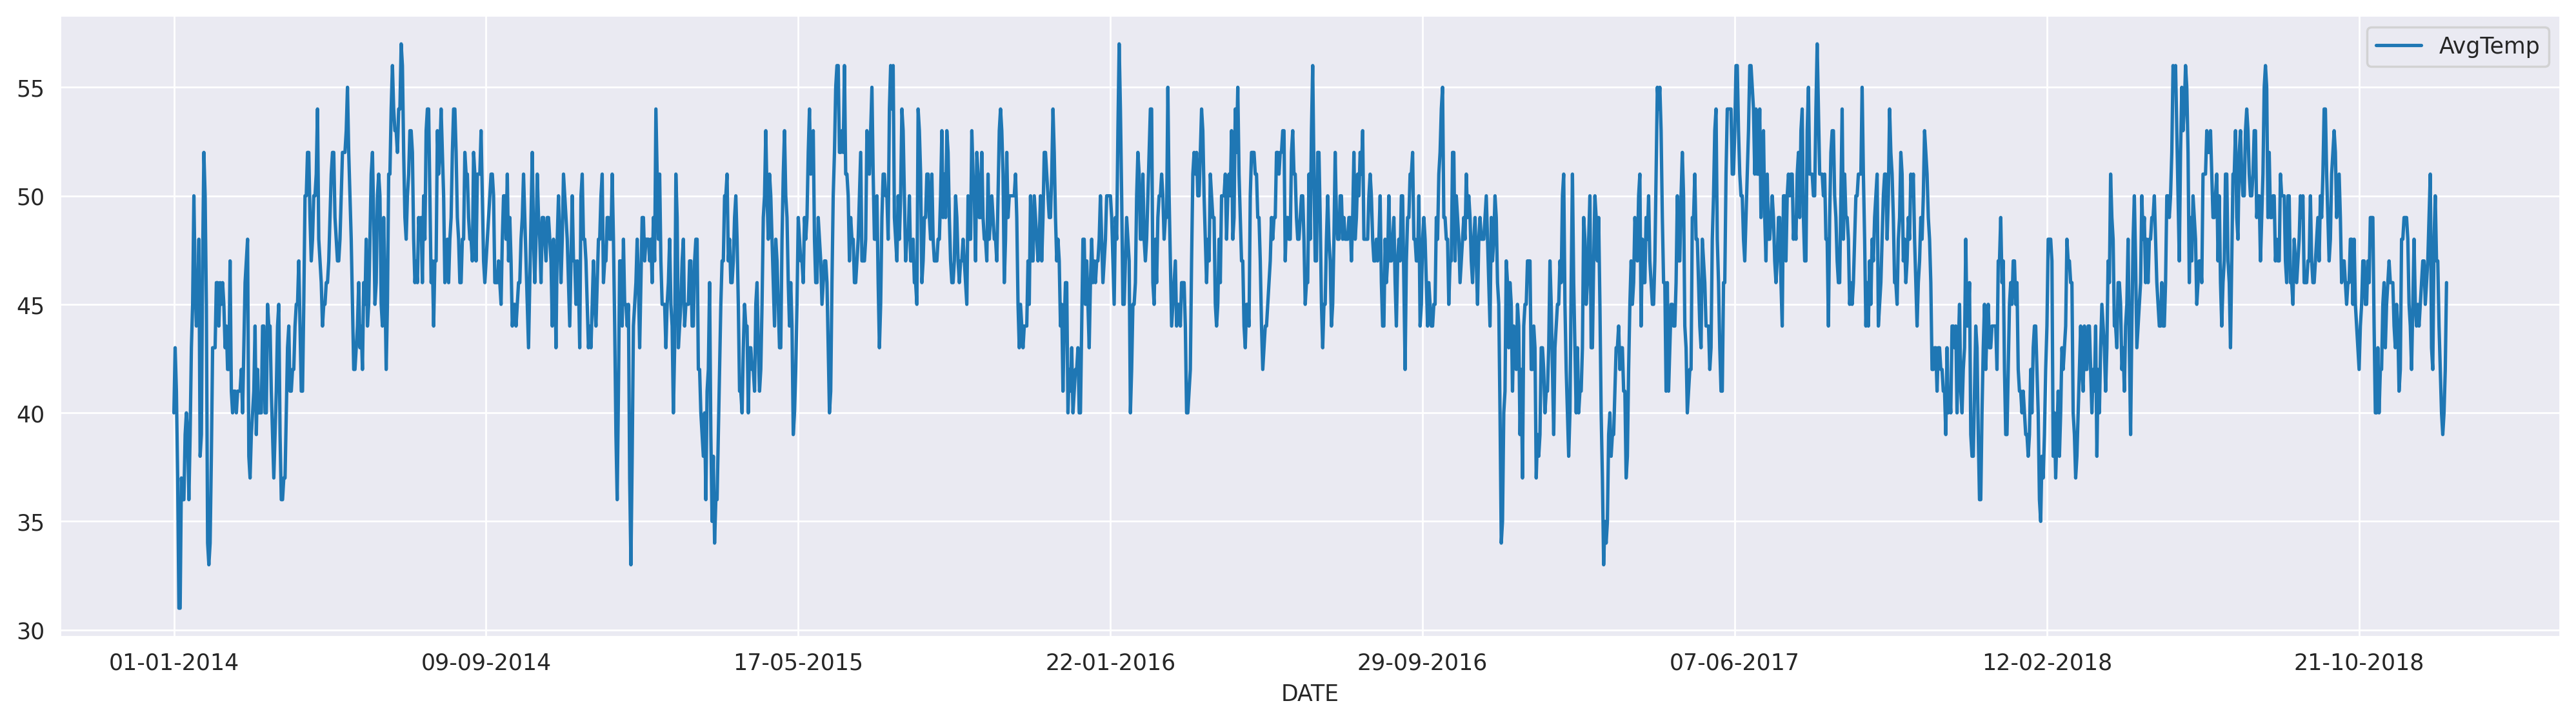

In [6]:
df.plot()

- We can see that it seems to have somewhat of a constant mean around 45. (That means constant trend is there i.e. stationary data).And the fluctuations also seem to be more or less the same. However to be sure if the data is stationary or not we will run adfuller test.

In [7]:
adfuller(df['AvgTemp'])[1] # returns p value at index 1

8.675937480199653e-09

**Null hypothesis: Data is Non-stationary**

**Alternate Hypothesis: Data is Stationary**
   


- If p< 0.05 ; Data is stationary

- if p>0.05; Data is not stationary

**According to the p-value, the dataset is stationary as the p value is less than alpha value.**

# Arima model building.
- ARIMA is composed of 3 terms(Auto-Regression(p) + Integrated(d) + Moving-Average(q))
- First, we need to find out the order of arima model.

In [ ]:
#find out order of arima

In [10]:
order = auto_arima(df['AvgTemp'])
# auto_arima() analyzes the data and determines the best ARIMA model parameters for your time series.

In [11]:
order
# AR(1): The 1 here refers to the Auto-Regressive (AR) part of the model, which uses the previous value(s) in the series to predict the current value.
# AR(1) means the model uses the immediate previous value to predict the current value.
# I(0): The 0 indicates the order of differencing required to make the series stationary.
# A value of 0 means the data is already stationary, and no differencing is needed.
# If this value were 1, it would mean the series was differenced once.
# MA(5): The 5 here refers to the Moving Average (MA) part of the model, which uses the past error terms to predict the current value.
# MA(5) means the model uses the last 5 error terms.

# Seasonal Component (0,0,0)[0]
# (0, 0, 0):
# These are the seasonal equivalents of ARIMA parameters:
# AR(S): Seasonal Auto-Regressive order. Here, it is 0, meaning no seasonal auto-regression.
# I(S): Seasonal Differencing order. Here, it is 0, meaning no seasonal differencing.
# MA(S): Seasonal Moving Average order. Here, it is 0, meaning no seasonal moving average.

# However, it doesn't account for any seasonal effects (e.g., temperature changes throughout the year).

ARIMA(order=(1, 0, 5), scoring_args={}, suppress_warnings=True)

In [12]:
df.shape

(1821, 1)

In [13]:
#Split the data
train = df.iloc[:-30]
test = df.iloc[-30:]

In [14]:
train.shape

(1791, 1)

In [15]:
train

,AvgTemp
DATE,
01-01-2014,40
02-01-2014,43
03-01-2014,41
04-01-2014,37
05-01-2014,31
...,...
26-11-2018,49
27-11-2018,49
28-11-2018,49


In [16]:
test.shape

(30, 1)

In [ ]:
#Arima model

In [17]:
model = ARIMA(train['AvgTemp'], order=(1, 0, 5)).fit()

# Evaluating the model

In [18]:
test

,AvgTemp
DATE,
01-12-2018,44
02-12-2018,42
03-12-2018,45
04-12-2018,48
05-12-2018,45
06-12-2018,44
07-12-2018,45
08-12-2018,44
09-12-2018,45


In [19]:
train

,AvgTemp
DATE,
01-01-2014,40
02-01-2014,43
03-01-2014,41
04-01-2014,37
05-01-2014,31
...,...
26-11-2018,49
27-11-2018,49
28-11-2018,49


In [20]:
ypred = model.predict(start =1791, end = 1820)
ypred

,predicted_mean
1791,44.754109
1792,44.987795
1793,45.388741
1794,45.721545
1795,45.863733
1796,45.874126
1797,45.884370
1798,45.894466
1799,45.904417
1800,45.914225


In [21]:
print(np.sqrt(mean_squared_error(test['AvgTemp'], ypred)))

3.000463825206671
